# SCP Visualizations
## Overview
This file was created to explore various visualizations of the SCP dataset in order to select interesting visualizations for the SCP Status dashboard.
## Setup

In [125]:
#!pip install kagglehub
#!pip install pandas
#!pip install matplotlib
#!pip install dash
#!pip install plotly

In [127]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import math
import re
import plotly.graph_objects as go
import plotly.express as px

pd.set_option('display.max_colwidth', None)

def contains_count(string, elements):
    count = 0
    for element in elements:
        count += string.count(element)
    return count

def get_class(text):
    x = re.findall("\\n (\w*) Class: (\w*) \\n", text)
    if x :
        return(list(x[0]))
    else:
        return ["None", "None"]
def get_class_type(text):
    return get_class(text)[0]
def get_class_spec(text):
    return get_class(text)[1]
def get_series(scp_code):
    num = int(scp_code[4:])
    return math.ceil(num/1000)

In [129]:
path = kagglehub.dataset_download("czzzzzzz/scp1to7")
df = pd.read_csv(f"{path}/scp6999.csv")

## Data Wrangling

Creating new columns to make information easier to access.

In [131]:
df["class type"] = df["text"].apply(get_class_type)
df["class"] = df["text"].apply(get_class_spec)
df["series"] = df["code"].apply(get_series)

## Visualizations
### Object classes

In [133]:
primary_classes=["Safe", "Euclid", "Keter"]
primary_classes_df = df[df["class"].isin(primary_classes)]

In [134]:
class_counts = primary_classes_df.groupby(["class", "series"]).count().reset_index()

In [135]:
class_counts

,class,series,code,title,text,image captions,rating,state,tags,link,class type
0,Euclid,1,415,415,415,97,415,415,415,415,415
1,Euclid,2,384,384,384,103,384,384,384,384,384
2,Euclid,3,391,391,391,168,391,391,391,391,391
3,Euclid,4,314,314,314,161,314,314,314,314,314
4,Euclid,5,212,212,212,137,212,212,212,212,212
5,Euclid,6,125,125,125,61,125,125,124,125,125
6,Euclid,7,56,56,56,24,56,56,53,56,56
7,Keter,1,95,95,95,33,95,95,95,95,95
8,Keter,2,83,83,83,36,83,83,83,83,83
9,Keter,3,107,107,107,49,107,107,107,107,107


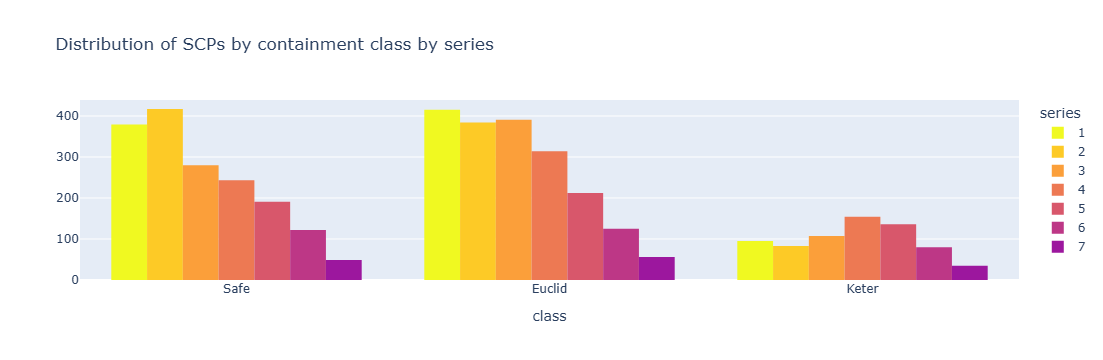

In [141]:
fig = px.histogram(class_counts, x="class", y="code", color="series", color_discrete_sequence=px.colors.sequential.Plasma_r, barmode="group",
                  title="Distribution of SCPs by containment class by series")
fig.update_xaxes(categoryorder="array", categoryarray=primary_classes)
fig.update_layout(yaxis_title="")
fig.update_traces(hovertemplate='Total SCPs: %{y}<extra></extra>')
fig.show()

So the code above gives me the exact graph I want but when I try it in Dash, I get a blank graph, with the error message "ValueError: Cannot accept list of column references or list of columns for both `x` and `y`."

I am going to try passing it the values in the form of lists.

In [150]:
x_data = class_counts["class"].tolist()
y_data = class_counts["code"].tolist()
color_data = class_counts["series"].tolist()

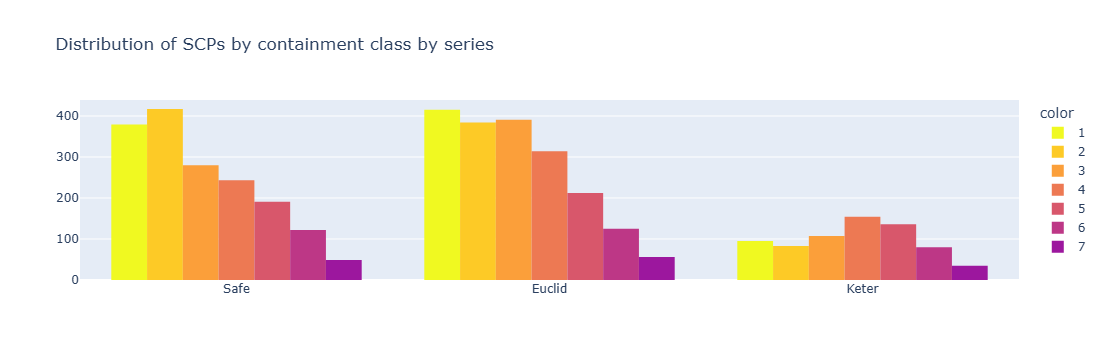

In [174]:
fig = px.histogram(class_counts, x=x_data, y=y_data, color=color_data, color_discrete_sequence=px.colors.sequential.Plasma_r, barmode="group",
                  title="Distribution of SCPs by containment class by series")
fig.update_xaxes(categoryorder="array", categoryarray=primary_classes)
fig.update_layout(yaxis_title="")
fig.update_layout(xaxis_title="class")
fig.update_traces(hovertemplate='Total SCPs: %{y}<extra></extra>')
fig.show()

Passing lists instead of DataFrame columns still results in the same error. Maybe I should specify that x is categorical?

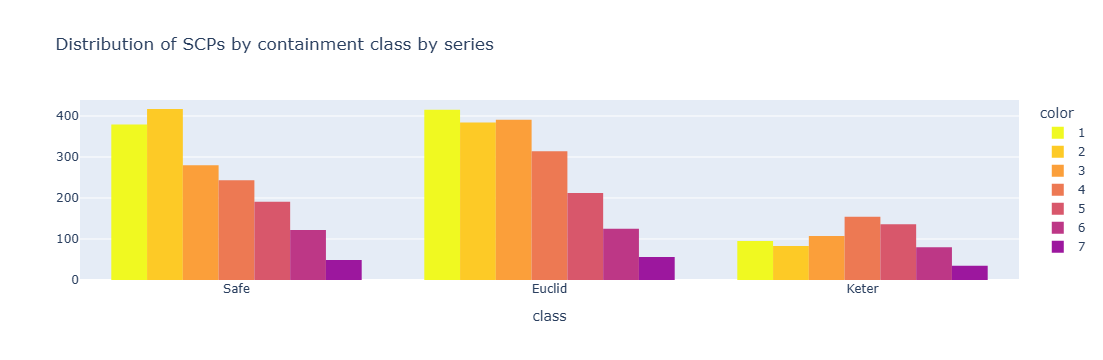

In [176]:
fig = px.histogram(class_counts, x=x_data, y=y_data, color=color_data, color_discrete_sequence=px.colors.sequential.Plasma_r, barmode="group",
                  title="Distribution of SCPs by containment class by series")
fig.update_xaxes(type="category", categoryorder="array", categoryarray=primary_classes)
fig.update_layout(yaxis_title="")
fig.update_layout(xaxis_title="class")
fig.update_traces(hovertemplate='Total SCPs: %{y}<extra></extra>')
fig.show()

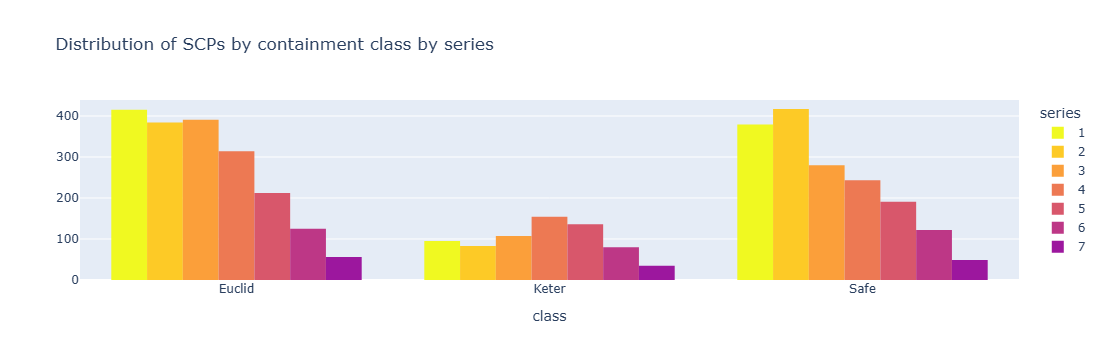

In [179]:
x_data = class_counts["class"].tolist()
y_data = class_counts["code"].tolist()
color_data = class_counts["series"].tolist()
data = {"class": x_data,
        "total SCPs": y_data,
        "series": color_data}
hist_df = pd.DataFrame(data)
fig1 = px.histogram(hist_df, x="class", y="total SCPs", color="series", color_discrete_sequence=px.colors.sequential.Plasma_r, barmode="group",
                  title="Distribution of SCPs by containment class by series")
fig1.update_layout(yaxis_title="")
fig1.update_layout(xaxis_title="class")
fig1.update_traces(hovertemplate='Total SCPs: %{y}<extra></extra>')
fig1.show()

So... I no longer get an error. I get... a blank graph instead!